---
# KMeans Clustering - Model 1
---


**Results**



---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

---

<center>
    
## Preparing data

</center>

---

### Read data file

In [1]:
df = pd.read_excel('')
df

NameError: name 'pd' is not defined

### Separate X and y features

In [2]:
# Seperate X and y features
X = df.drop(columns=[''])
y = df['']


NameError: name 'df' is not defined

### Scale X features

In [177]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
X_sub_scaled = scaler.fit_transform(X_sub)

---

<center>
    
## Find best optimal K value

</center>

---

**Elbow plot**

In [6]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(2, 100):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

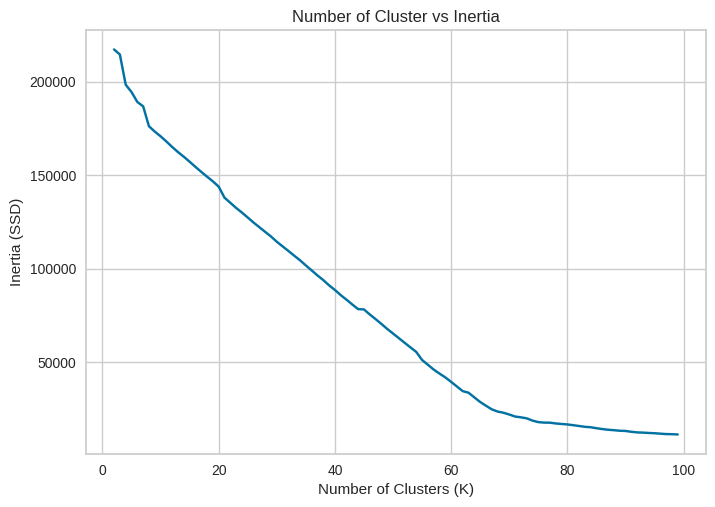

In [7]:
# Plot the elbow graph
plt.plot(range(2, 100), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

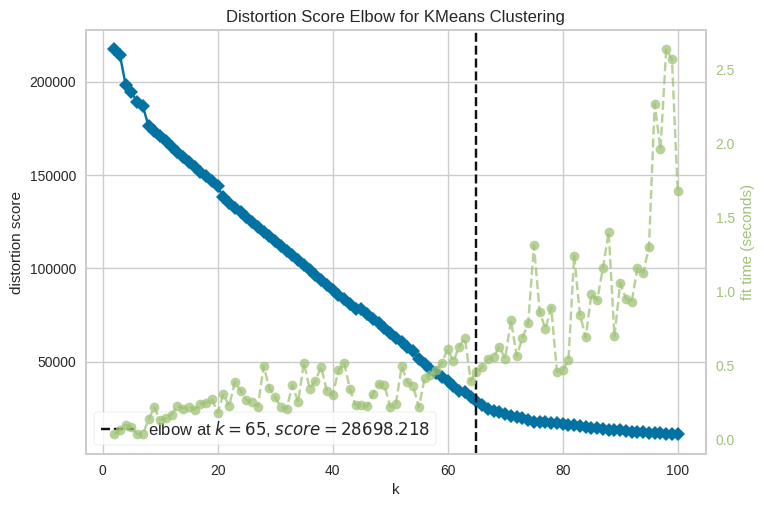

In [8]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=100)
Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---

<center>
    
## KMeans Model

</center>

---

---
### Creating a KMeans model with X clusters

---

**Create intance of model**

In [12]:
kmeans = KMeans(n_clusters=, random_state=5)

**Fit the model on the dataset**

In [13]:
kmeans.fit(X_scaled)

KMeans(n_clusters=60, random_state=5)

---
### Evaluate the value K= for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [14]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

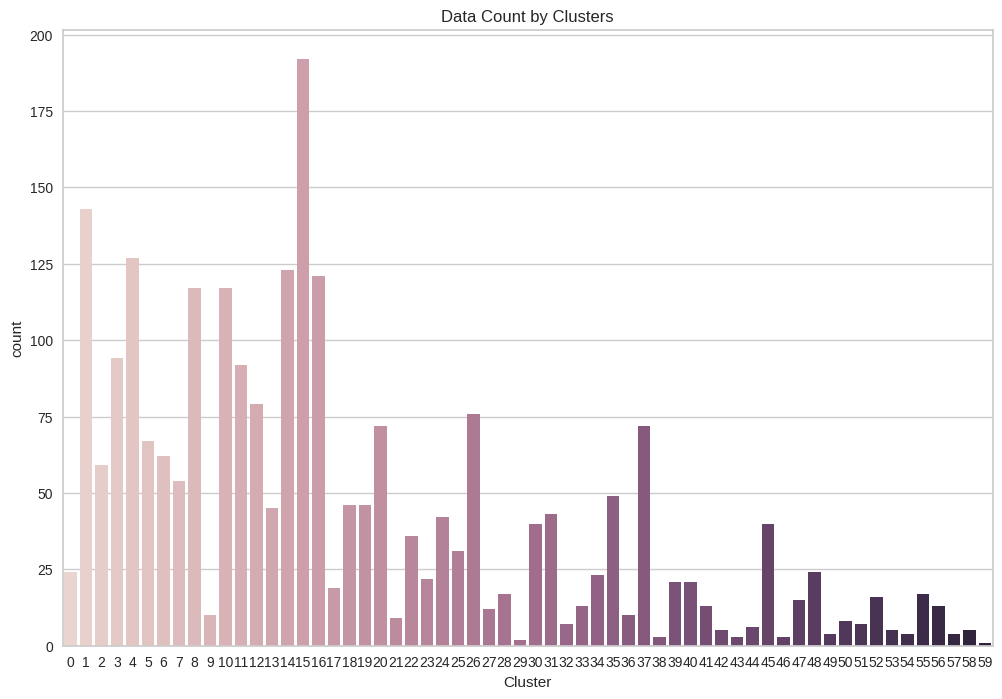

In [15]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

---
### Evaluate the value K=60 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [14]:
df_o['label'] = kmeans.labels_

df_o['label_str'] = kmeans.labels_.astype(str)

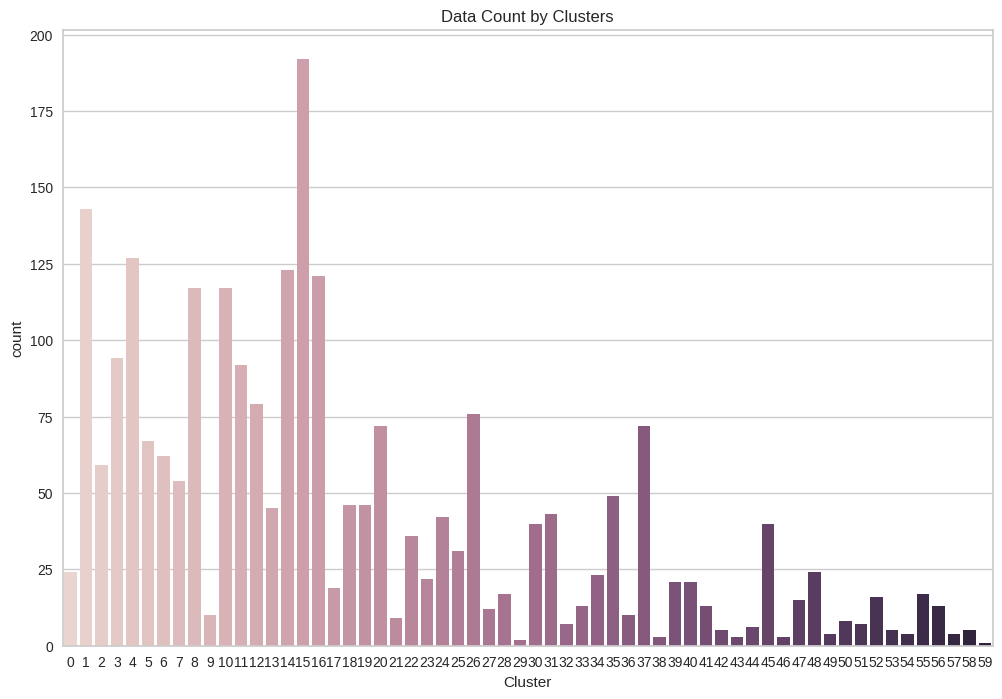

In [15]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

---

<center>
    
## Results

</center>

---